# Parsing evaluation

In [1]:
# Add GDrive
from google.colab import drive
import sys
drive.mount('/content/drive/')
sys.path.append('/content/drive/My Drive/Datasets/Recipe1M/')

Mounted at /content/drive/


In [1]:
import pandas as pd
import glob
FILE_DIR = '/content/drive/My Drive/Datasets/Recipe1M/2022_03_30/'
files = glob.glob(f'{FILE_DIR}recipes_valid_*.pkl')

recipes = pd.DataFrame()

for f in files:
    print(f'Reading: {f}')
    recipes = recipes.append(pd.read_pickle(f))

ingredient_list = recipes.ingredients
print(f'Total number of recipes: {len(recipes)}')

Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_0.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_1.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_2.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_3.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_4.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_5.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_6.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_7.pkl
Reading: /content/drive/My Drive/Datasets/Recipe1M/2022_03_30/recipes_valid_8.pkl
Total number of recipes: 835242


In [2]:
ingredients = []
units = []
for _, elem in ingredient_list.iteritems():
    ingredients.extend(elem.ingredient.tolist())
    units.extend(elem.unit.tolist())

In [3]:
data = pd.DataFrame(
    {'unit': units,
     'ingredient': ingredients
    })

In [4]:
unique_units = data.unit.value_counts()
unique_units_norm = data.unit.value_counts(normalize=True)
unique_ingredients = data.ingredient.value_counts()[0:30]
unique_ingredients_norm = unique_ingredients / len(recipes)

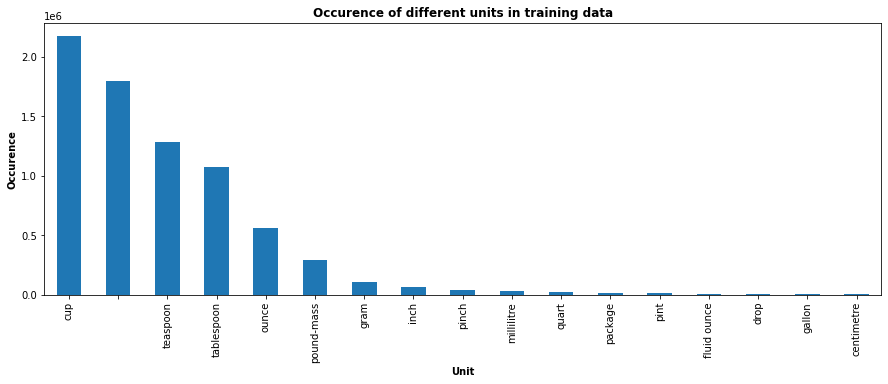

In [5]:
import matplotlib.pyplot as plt
plot = unique_units.plot.bar(figsize=(15,5), align='center')
plot.set_xlabel('Unit', fontdict=dict(weight='bold'))
plot.set_ylabel('Occurence', fontdict=dict(weight='bold'))
plot.set_title('Occurence of different units in training data', fontdict=dict(weight='bold'))
plt.savefig(f'{FILE_DIR}units.png', bbox_inches='tight', dpi=200)
plt.show()


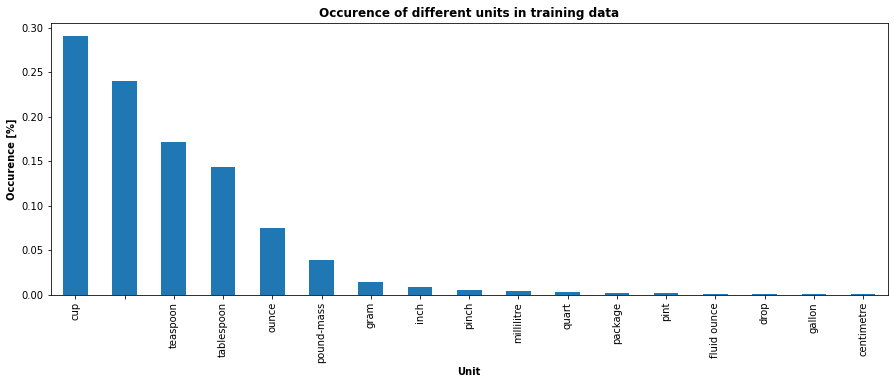

In [6]:
import matplotlib.pyplot as plt
plot = unique_units_norm.plot.bar(figsize=(15,5), align='center')
plot.set_xlabel('Unit', fontdict=dict(weight='bold'))
plot.set_ylabel('Occurence [%]', fontdict=dict(weight='bold'))
plot.set_title('Occurence of different units in training data', fontdict=dict(weight='bold'))
plt.savefig(f'{FILE_DIR}units_norm.png', bbox_inches='tight', dpi=200)
plt.show()

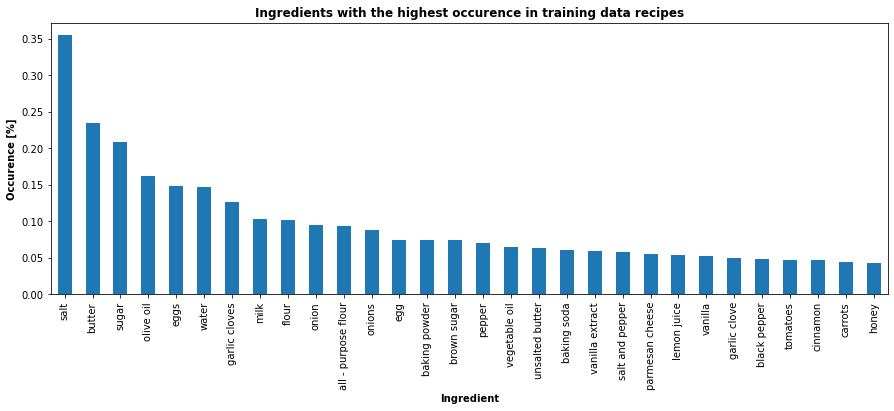

In [7]:
import matplotlib.pyplot as plt
plot = unique_ingredients_norm.plot.bar(figsize=(15,5), align='center')
plot.set_xlabel('Ingredient', fontdict=dict(weight='bold'))
plot.set_ylabel('Occurence [%]', fontdict=dict(weight='bold'))
plot.set_title('Ingredients with the highest occurence in training data recipes', fontdict=dict(weight='bold'))
plt.savefig(f'{FILE_DIR}ingredients.png', bbox_inches='tight', dpi=200)
plt.show()